In [68]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler,OneHotEncoder,power_transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')




In [2]:
df=pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df_new=pd.read_csv('happiness_score_dataset.csv',index_col='Country')
df_new

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [4]:
df_new.columns

Index(['Region', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    object 
 1   Happiness Rank                 158 non-null    int64  
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.8+ KB


In [6]:
df_new.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
print('shape of the dataset is:-\n',df_new.shape)

shape of the dataset is:-
 (158, 11)


In [8]:
df_new.drop(['Standard Error','Dystopia Residual','Region'],axis=1,inplace=True)




In [9]:
df_new.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Country,,,,,,,,
Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [10]:
df_new.columns

Index(['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [11]:
df_new.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

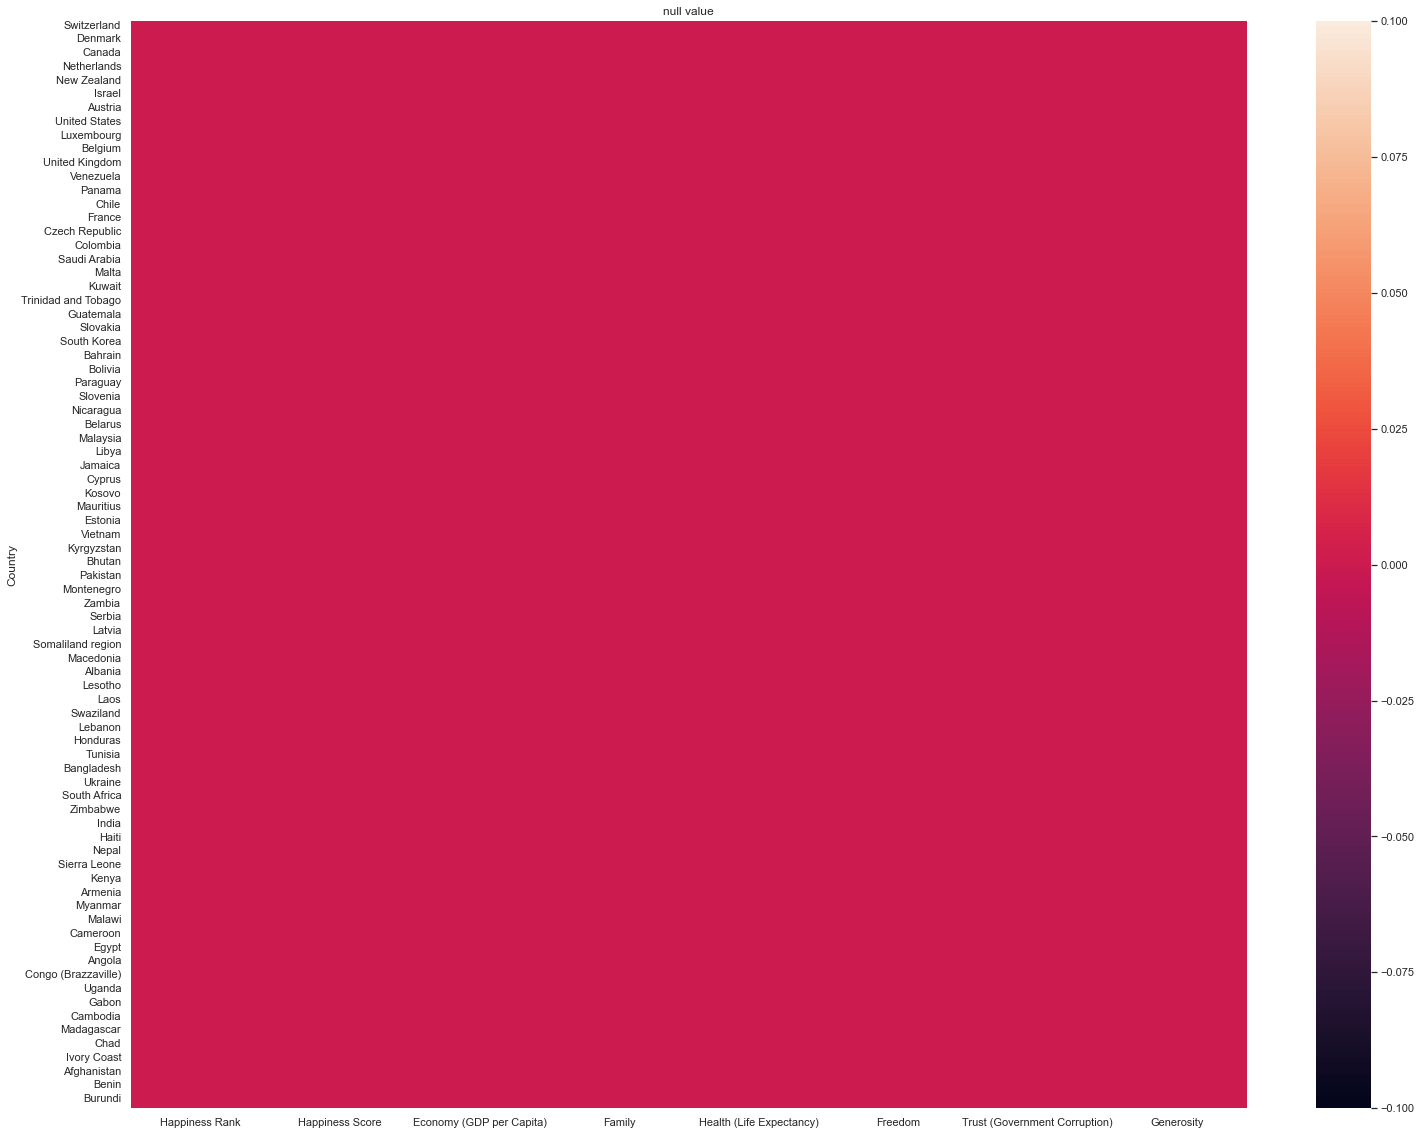

In [12]:
plt.figure(figsize=[25,20])
sns.heatmap(df_new.isnull())
plt.title('null value')
plt.show()
           

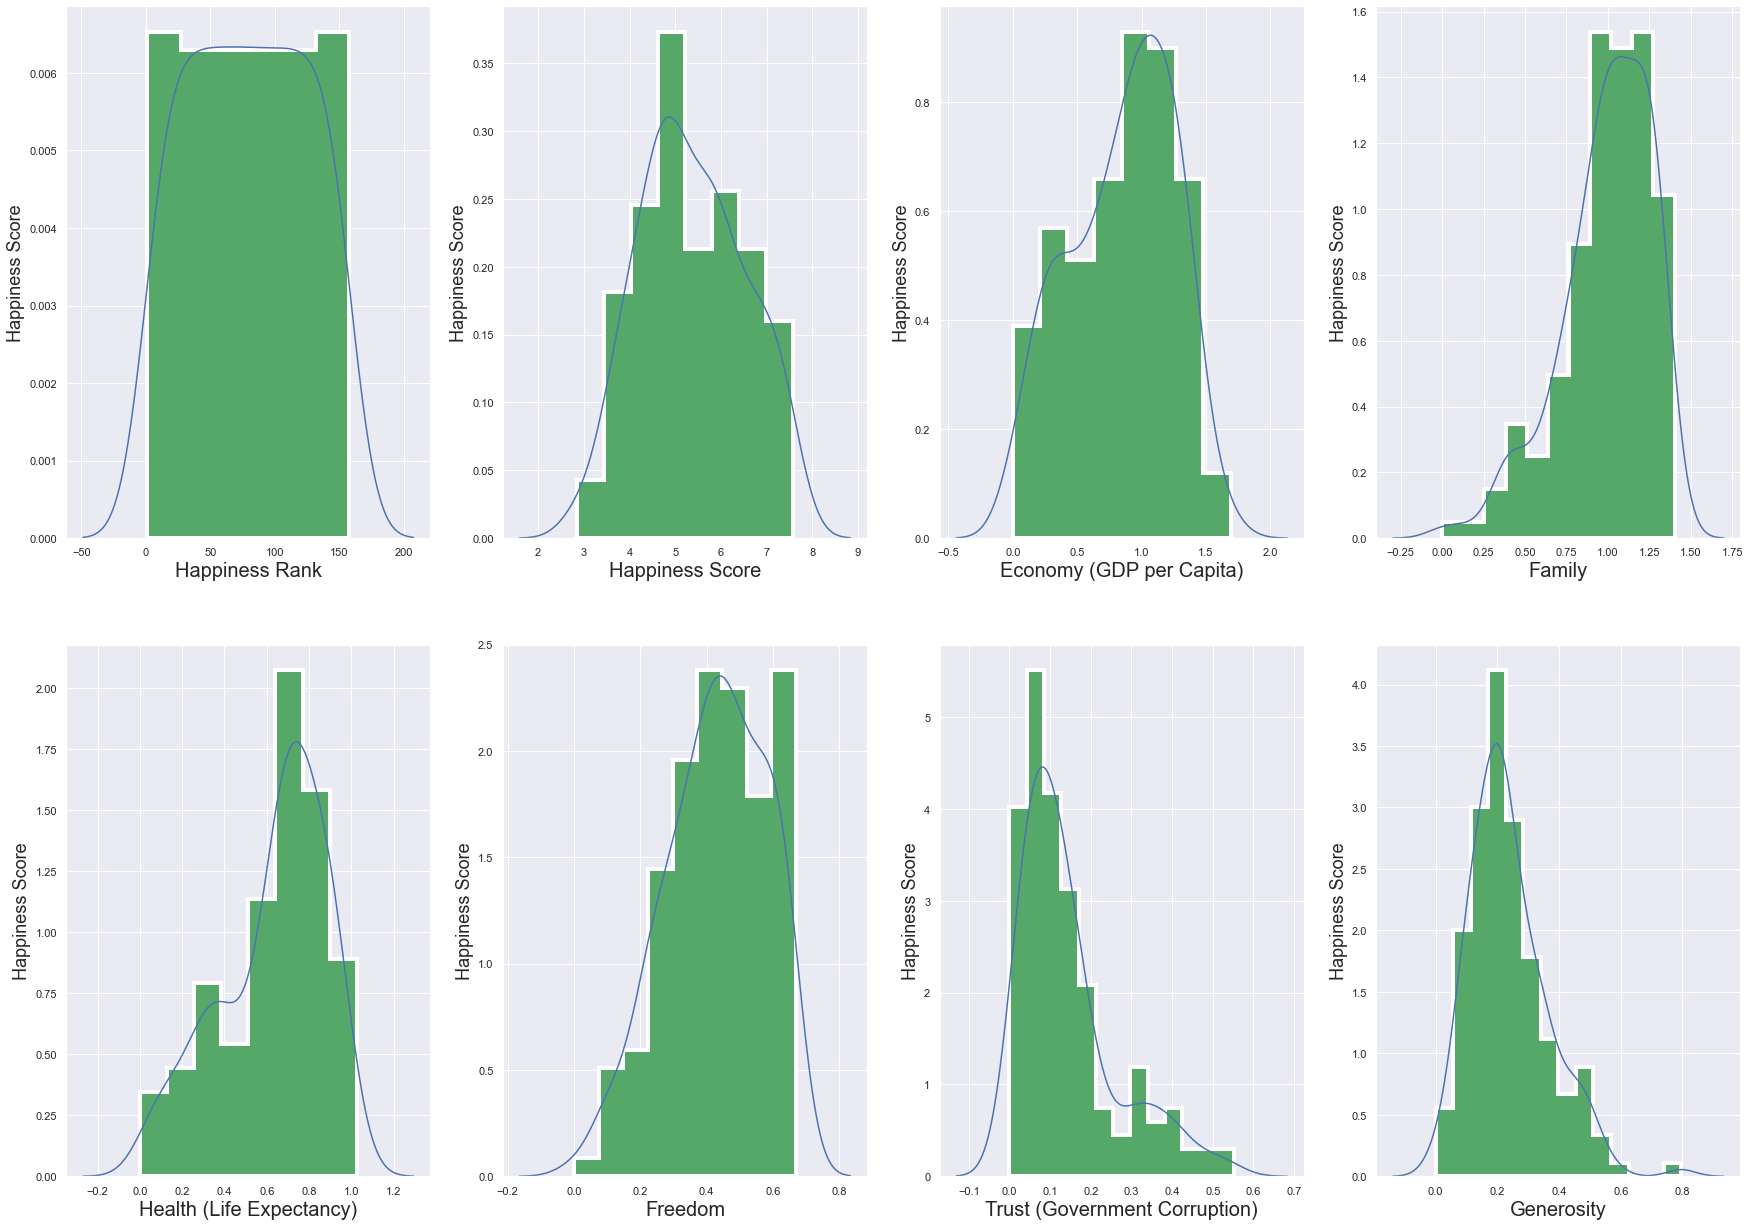

In [23]:
plt.figure(figsize=[30,45])
plotnumber=1

for column in df_new.columns:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
    
    
        sns.distplot(df_new[column], hist_kws={"histtype": "stepfilled", "linewidth": 4,"alpha": 1, "color": "g"})
                               
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=18)
    plotnumber+=1    
plt.show()

In [24]:
corr_matrix=df_new.corr()
corr_matrix

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Rank,1.000000,-0.992105,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142
Happiness Score,-0.992105,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319
Economy (GDP per Capita),-0.785267,0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465
Family,-0.733644,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513
Health (Life Expectancy),-0.735613,0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335
Freedom,-0.556886,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916
Trust (Government Corruption),-0.372315,0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123
Generosity,-0.160142,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000


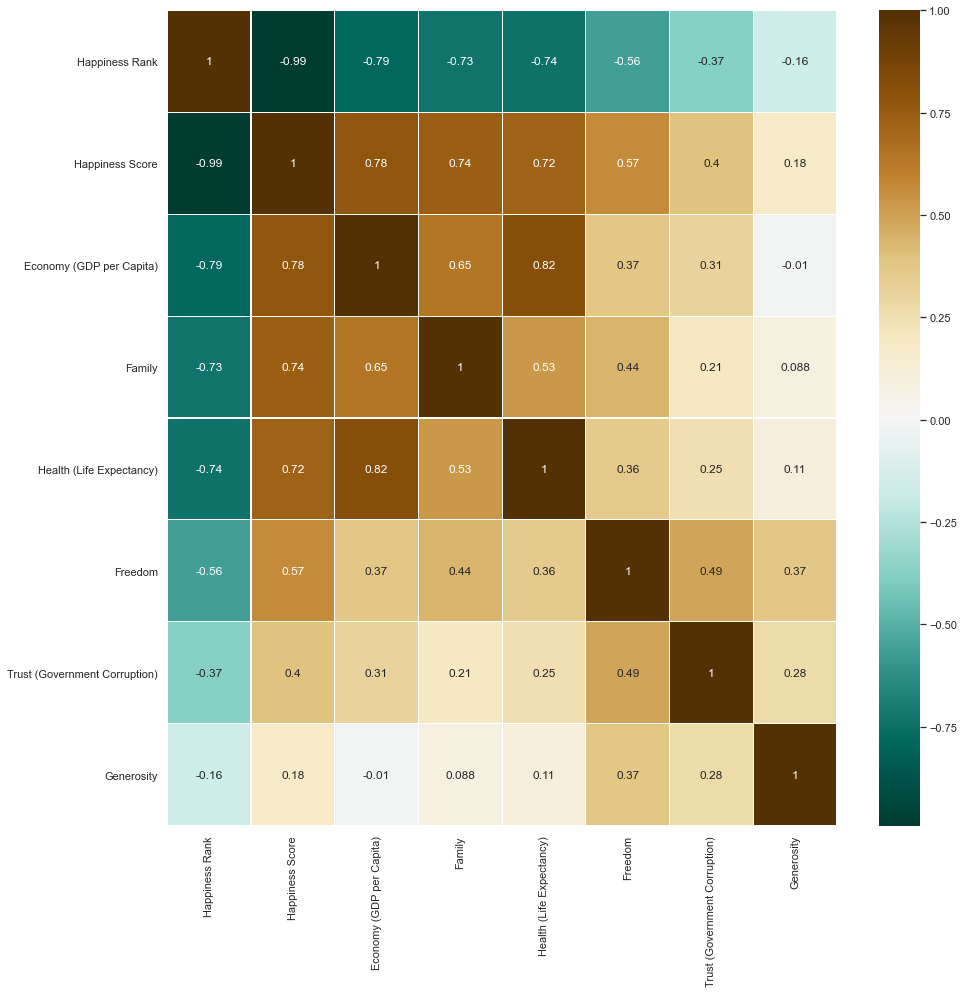

In [32]:
plt.figure(figsize=[15,15])
sns.heatmap(corr_matrix,annot=True,linewidths=0.1,cmap='BrBG_r')
plt.show()

In [33]:
corr_matrix=df.corr()
corr_matrix['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

In [36]:
x=df_new.drop(['Happiness Score'],axis=1)
y=df_new['Happiness Score']

In [45]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=340)

In [55]:
lr=LinearRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))




print('Mean squared error is:-\n',mean_squared_error(predlr,y_test))



0.9868056584742843
0.9802799704940081
Mean squared error is:-
 0.018975940090952


In [62]:
dtr=DecisionTreeRegressor()

dtr.fit(x_train,y_train)
predtr=dtr.predict(x_test)
print(dtr.score(x_train,y_train))
print(dtr.score(x_test,y_test))




print('Mean squared error is:-\n',mean_squared_error(predtr,y_test))


1.0
0.9925510824329635
Mean squared error is:-
 0.0071678500000000285


In [64]:
knn=KNeighborsRegressor()

knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))




print('Mean squared error is:-\n',mean_squared_error(predknn,y_test))


0.9171440714518715
0.8553661825330967
Mean squared error is:-
 0.1391763969999999


In [67]:
rfr=RandomForestRegressor()

rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
print(rfr.score(x_train,y_train))
print(rfr.score(x_test,y_test))




print('Mean squared error is:-\n',mean_squared_error(predrfr,y_test))


0.9994319272001878
0.9955219730818514
Mean squared error is:-
 0.00430905899499993


In [69]:
svr=SVR()

svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
print(svr.score(x_train,y_train))
print(svr.score(x_test,y_test))




print('Mean squared error is:-\n',mean_squared_error(predsvr,y_test))


0.9839067439327468
0.9265133910438195
Mean squared error is:-
 0.07071376280730142
